In [5]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# DA on the Output Rate of Broker-1
df1b = pd.read_csv("Brok1OR.csv")
df1b.drop(['name'], axis=1, inplace=True)
df1b['timestamp'] = pd.to_datetime(df1b['timestamp'], unit='s')
df1b.head(3)

,timestamp,values,pod
0,2021-07-31 14:37:27,449313,my-cluster-metrics-kafka-0
1,2021-07-31 14:37:57,468877,my-cluster-metrics-kafka-0
2,2021-07-31 14:38:27,468877,my-cluster-metrics-kafka-0


In [6]:
#Average Output Rate before rebalancing
orbr1 = df1b[(df1b['timestamp'] >= '2021-07-31 14:45:27') & (df1b['timestamp'] <= '2021-07-31 15:16:57')]
orbr1.head(3)
orbr1avg = orbr1['values'].mean()
print(orbr1avg)
orbr1.describe()


197849110.828125


,values
count,6.400000e+01
mean,1.978491e+08
std,1.941719e+08
min,2.410099e+07
25%,2.431209e+07
50%,1.862885e+08
75%,3.372053e+08
max,6.264148e+08


In [7]:
#Average Output Rate During rebalancing
ordr1 = df1b[(df1b['timestamp'] >= '2021-07-31 15:17:27') & (df1b['timestamp'] <= '2021-07-31 15:28:27')]
ordr1.head(3)
ordr1avg = ordr1['values'].mean()
print(ordr1avg)
ordr1.describe()


837088555.9565217


,values
count,2.300000e+01
mean,8.370886e+08
std,1.292640e+08
min,6.352487e+08
25%,6.961317e+08
50%,8.929772e+08
75%,9.366047e+08
max,9.766810e+08


In [8]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb1or = ttest_ind(ordr1['values'], orbr1['values'])
print(resb1or)

Ttest_indResult(statistic=14.637414131499021, pvalue=5.9588497612483185e-25)


In [9]:
orbr1.drop(['pod'], axis=1, inplace=True)
orbr1.head(10)
orbr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 16 to 79
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  64 non-null     datetime64[ns]
 1   values     64 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
ordr1.drop(['pod'], axis=1, inplace=True)
ordr1.head(10)
ordr1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 80 to 102
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  23 non-null     datetime64[ns]
 1   values     23 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 552.0 bytes


Text(0.5, 1.0, 'Broker1 Output Rate')

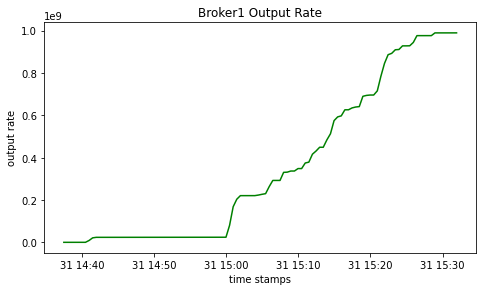

In [11]:
from datetime import datetime
#Output Rate for the entire load test
o1=[]
for dat in df1b.timestamp:
    # print (dat)
    o1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig1 = plt.figure(figsize=(10,4))
axe1 = fig1.add_axes([0.2, 0.1, 0.6, 0.8])
axe1.plot(o1,df1b['values'], 'g')
axe1.set_xlabel('time stamps')
axe1.set_ylabel('output rate')
axe1.set_title('Broker1 Output Rate')
#fig1.tight_layout()

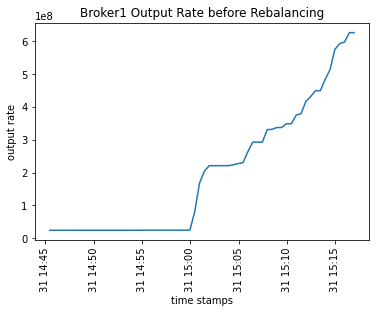

In [12]:
#Output Rate before rebalancing
b1=[]
for dat in orbr1.timestamp:
    # print (dat)
    b1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b1,orbr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker1 Output Rate before Rebalancing')
plt.show()


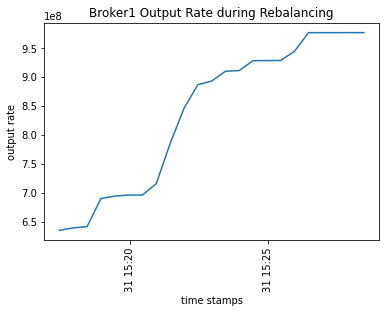

In [13]:
#Output Rate during rebalancing
d1=[]
for dat in ordr1.timestamp:
    # print (dat)
    d1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d1,ordr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker1 Output Rate during Rebalancing')
plt.show()

In [15]:
# DA on the Output Rate of Broker-2
df2b = pd.read_csv("Brok2OR.csv")
df2b.drop(['name'], axis=1, inplace=True)
df2b['timestamp'] = pd.to_datetime(df2b['timestamp'], unit='s')
df2b.head(3)

,timestamp,values,pod
0,2021-07-31 14:37:09,28755,my-cluster-metrics-kafka-1
1,2021-07-31 14:37:39,28755,my-cluster-metrics-kafka-1
2,2021-07-31 14:38:09,28755,my-cluster-metrics-kafka-1


In [16]:
#Average Output Rate before rebalancing
orbr2 = df2b[(df2b['timestamp'] >= '2021-07-31 14:45:09') & (df2b['timestamp'] <= '2021-07-31 15:17:09')]
orbr2.head(3)
orbr2avg = orbr2['values'].mean()
print(orbr2avg)
orbr2.describe()

185278125.26153848


,values
count,6.500000e+01
mean,1.852781e+08
std,1.682228e+08
min,3.640875e+07
25%,3.640875e+07
50%,1.620640e+08
75%,2.961199e+08
max,5.615607e+08


In [17]:
#Average Output Rate During rebalancing
ordr2 = df2b[(df2b['timestamp'] >= '2021-07-31 15:17:39') & (df2b['timestamp'] <= '2021-07-31 15:28:09')]
ordr2.head(3)
ordr2avg = ordr2['values'].mean()
print(ordr2avg)
ordr2.describe()

746942847.9090909


,values
count,2.200000e+01
mean,7.469428e+08
std,1.319359e+08
min,5.637689e+08
25%,5.922714e+08
50%,7.990236e+08
75%,8.458159e+08
max,8.972230e+08


In [18]:
#T-Stats Analysis
resb2or = ttest_ind(ordr2['values'], orbr2['values'])
print(resb2or)

Ttest_indResult(statistic=14.229769169529812, pvalue=3.304197088632221e-24)


In [19]:
orbr2.drop(['pod'], axis=1, inplace=True)
orbr2.head(10)
orbr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 16 to 80
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  65 non-null     datetime64[ns]
 1   values     65 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
ordr2.drop(['pod'], axis=1, inplace=True)
ordr2.head(10)
ordr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 81 to 102
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  22 non-null     datetime64[ns]
 1   values     22 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 528.0 bytes


Text(0.5, 1.0, 'Broker2 Output Rate')

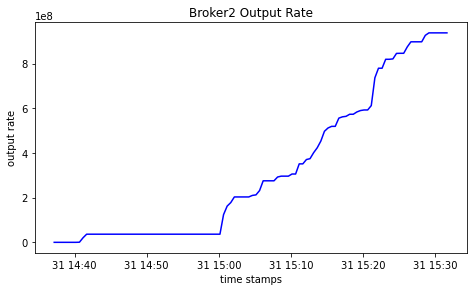

In [21]:
from datetime import datetime
#Output Rate for the entire load test
o2=[]
for dat in df2b.timestamp:
    # print (dat)
    o2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig2 = plt.figure(figsize=(10,4))
axe2 = fig2.add_axes([0.2, 0.1, 0.6, 0.8])
axe2.plot(o2,df2b['values'], 'b')
axe2.set_xlabel('time stamps')
axe2.set_ylabel('output rate')
axe2.set_title('Broker2 Output Rate')
#fig1.tight_layout()

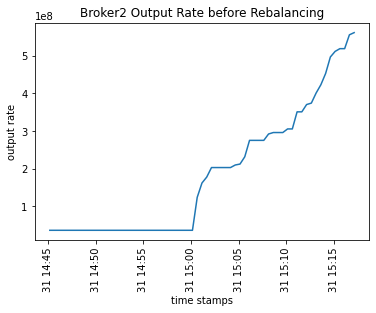

In [22]:
#Output Rate before rebalancing
b2=[]
for dat in orbr2.timestamp:
    # print (dat)
    b2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b2,orbr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker2 Output Rate before Rebalancing')
plt.show()

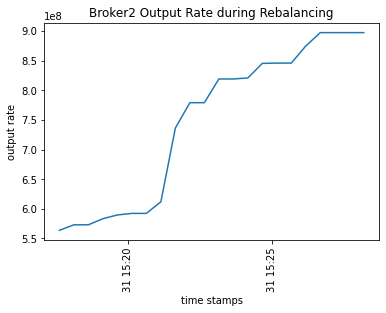

In [23]:
#Output Rate during rebalancing
d2=[]
for dat in ordr2.timestamp:
    # print (dat)
    d2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d2,ordr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker2 Output Rate during Rebalancing')
plt.show()

In [25]:
# DA on the Output Rate of Broker-3
df3b = pd.read_csv("Brok3OR.csv")
df3b.drop(['name'], axis=1, inplace=True)
df3b['timestamp'] = pd.to_datetime(df3b['timestamp'], unit='s')
df3b.head(3)

,timestamp,values,pod
0,2021-07-31 14:41:02,7072145,my-cluster-metrics-kafka-2
1,2021-07-31 14:41:32,15466273,my-cluster-metrics-kafka-2
2,2021-07-31 14:42:02,15466273,my-cluster-metrics-kafka-2


In [26]:
#Average Output Rate before rebalancing
orbr3 = df3b[(df3b['timestamp'] >= '2021-07-31 14:45:02') & (df3b['timestamp'] <= '2021-07-31 15:17:02')]
orbr3.head(3)
orbr3avg = orbr3['values'].mean()
print(orbr3avg)
orbr3.describe()

159435112.06153846


,values
count,6.500000e+01
mean,1.594351e+08
std,1.690764e+08
min,1.546627e+07
25%,1.546627e+07
50%,1.114147e+08
75%,2.650851e+08
max,5.435700e+08


In [27]:
#Average Output Rate During rebalancing
ordr3 = df3b[(df3b['timestamp'] >= '2021-07-31 15:17:32') & (df3b['timestamp'] <= '2021-07-31 15:28:02')]
ordr3.head(3)
ordr3avg = ordr3['values'].mean()
print(ordr3avg)
ordr3.describe()

738521682.3636364


,values
count,2.200000e+01
mean,7.385217e+08
std,1.220111e+08
min,5.468605e+08
25%,6.159737e+08
50%,7.730500e+08
75%,8.217464e+08
max,8.966969e+08


In [28]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb3or = ttest_ind(ordr3['values'], orbr3['values'])
print(resb3or)

Ttest_indResult(statistic=14.788818227477261, pvalue=3.170839564051365e-25)


In [29]:
orbr3.drop(['pod'], axis=1, inplace=True)
orbr3.head(10)
orbr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 8 to 72
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  65 non-null     datetime64[ns]
 1   values     65 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
ordr3.drop(['pod'], axis=1, inplace=True)
ordr3.head(10)
ordr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 73 to 94
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  22 non-null     datetime64[ns]
 1   values     22 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 528.0 bytes


Text(0.5, 1.0, 'Broker3 Output Rate')

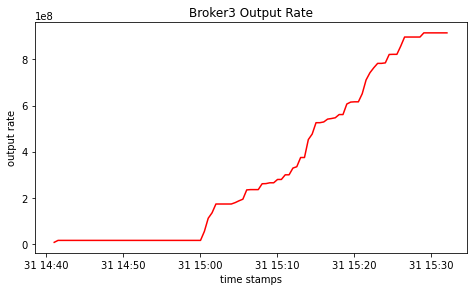

In [31]:
from datetime import datetime
#Output Rate for the entire load test
o3=[]
for dat in df3b.timestamp:
    # print (dat)
    o3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig3 = plt.figure(figsize=(10,4))
axe3 = fig3.add_axes([0.2, 0.1, 0.6, 0.8])
axe3.plot(o3,df3b['values'], 'r')
axe3.set_xlabel('time stamps')
axe3.set_ylabel('output rate')
axe3.set_title('Broker3 Output Rate')
#fig1.tight_layout()

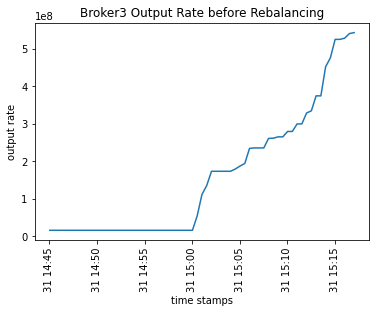

In [32]:
#Output Rate before rebalancing
b3=[]
for dat in orbr3.timestamp:
    # print (dat)
    b3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b3,orbr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker3 Output Rate before Rebalancing')
plt.show()

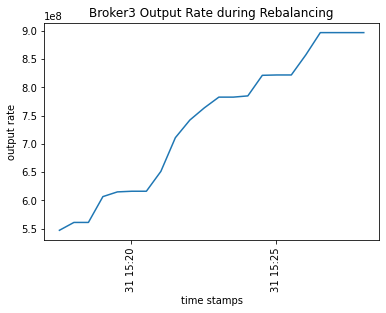

In [33]:
#Output Rate during rebalancing
d3=[]
for dat in ordr3.timestamp:
    # print (dat)
    d3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d3,ordr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('output rate')
plt.title('Broker3 Output Rate during Rebalancing')
plt.show()